Homework 3 for Machine learning with python <br>
Data source:  https://archive.ics.uci.edu/ml/datasets/heart+disease <br>  

Import required liberies

In [856]:
import os
import pandas as pd # to load and manipulating data and for one_hot encoding
import numpy as np # to calculate mean and standard deviations

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from sklearn.model_selection import train_test_split # to split data into training and testing sets
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree # to draw a classification tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix # to draw confusion_matrix

import matplotlib.pyplot as plt # to draw graph
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

1. Load the dataset 

In [857]:
#Changing working directory
os.chdir(r'H:\EMK_Data analysis with python')

#Read 'csv' file
df = pd.read_csv('processed.cleveland.data',encoding = 'unicode_escape', header= None)

display(df.head())
print(df.shape)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


(303, 14)


No column name present in the data set, only column numbers.

In [858]:
#Changing the column numbers to column name
df.columns = ['age',
             'sex',
             'cp',
             'trestbps',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']

display(df.head())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


2. Explain the features and target variable

#Features variables (Independent variable): <br>
<br>
age: age in years<br>
sex: sex (1 = male; 0 = female)<br>
cp: chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)<br>
trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br>
chol: serum cholestoral in mg/dl<br>
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
restecg: resting electrocardiographic results (Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)
thalach: maximum heart rate achieved <br>
exang: exercise induced angina (1 = yes; 0 = no)<br>
oldpeak = ST depression induced by exercise relative to rest<br>
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)<br>
ca: number of major vessels (0-3) colored by flourosopy<br>
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
<br>
#Target variable ((Dependent variable)):<br>

hd: diagnosis of heart disease (Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing)<br>

3. Deal with the missing values

In [859]:
#To find out overall information of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  hd        303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None


In [860]:
#As 'ca' and 'thal' data type are showing object, so there might be missing value present.
#Now code for finding unique value in 'ca' and 'thal'.
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [861]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [862]:
#So, '?' is representing the missing value. Here, we will remove the rows that contain the missing value.
#To find out the rows that contain missing value
df.loc[(df['ca'] == '?')
      |
      (df['thal'] == '?')]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [863]:
#To delete missing rows select all the rows without missing value and save it in new dataframe
df_no_missing = df.loc[(df['ca'] != '?')
      &
      (df['thal'] != '?')]
print(df_no_missing.shape)

(297, 14)


So, we successfully remove the rows with missing value

4. Perform One-hot Encoding

#First separating the features (X) and target (y) variable

In [865]:
X = df_no_missing.drop('hd', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [866]:
Target= ['hd']
y = df_no_missing[Target]
y.head()

,hd
0,0
1,2
2,1
3,0
4,0


Here, in dataset X variable have 5 columns those are categorical.

In [867]:
#Unique value in 'cp' column
df_no_missing['cp'].unique()

array([1., 4., 3., 2.])

In [868]:
#Unique value in 'restecg' column
df_no_missing['restecg'].unique()

array([2., 0., 1.])

In [869]:
#Unique value in 'slope' column
df_no_missing['slope'].unique()

array([3., 2., 1.])

In [870]:
#Unique value in 'ca' column
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [871]:
#Unique value in 'thal' column
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [872]:
#One_hot_encoding for categorical data
X_encoded = pd.get_dummies(X,columns= ['cp',
                                      'restecg',
                                      'slope',
                                      'ca',
                                      'thal'], drop_first=True)
print(X_encoded.shape)
display(X_encoded.head())


(297, 20)


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0,0,0,0,1,0,1,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,1,0,1,1,0,0,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,1,0,1,1,0,0,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,1,0,0,0,0,1,0,0,0,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,1,0,0,0,1,0,0,0,0,0,0,0


In [873]:
#y.unique()

In [874]:
# Condition to convert 'hd' column into 0 and 1 variables.
y_not_zero = y > 0

In [875]:
y[y_not_zero] = 1
#y.unique()

In [876]:
print(y.shape)

(297, 1)


In [877]:
print(X_encoded.shape, y.shape)

(297, 20) (297, 1)


5. Split the dataset into 80% training and 20% for testing. Add random state and stratification

In [878]:
#Creating train dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(237, 20) (60, 20) (237, 1) (60, 1)


In [879]:
#Stratification

In [880]:
class_0_train = y_train['hd'].value_counts().values[0]
class_1_train = y_train['hd'].value_counts().values[1]

train_ratio = class_1_train/class_0_train
print(train_ratio)

0.8515625


In [881]:
class_0_test = y_test['hd'].value_counts().values[0]
class_1_test = y_test['hd'].value_counts().values[1]

test_ratio = class_1_test/class_0_test
print(test_ratio)

0.875


6. Perform the training with Decision Tree Classifier

In [882]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)

In [883]:
#Prediction
y_pred = model.predict(X_test)

In [884]:
#Prediction Comparison with the test data
y_test['probability'] = np.round(model.predict_proba(X_test)[:,1],2)
y_test['predicted_HD'] = y_pred

display(y_test.sample(10))

,hd,probability,predicted_HD
275,0,0.0,0
206,1,1.0,1
295,0,0.0,0
135,0,0.0,0
214,1,1.0,1
194,0,0.0,0
238,0,0.0,0
216,0,0.0,0
66,1,1.0,1
6,1,1.0,1


In [885]:
test = pd.concat([X_test, y_test], axis=1)
display(test.sample(10))

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,ca_1.0,ca_2.0,ca_3.0,thal_6.0,thal_7.0,hd,probability,predicted_HD
245,67.0,1.0,120.0,237.0,0.0,71.0,0.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0.0,0
33,59.0,1.0,135.0,234.0,0.0,161.0,0.0,0.5,0,0,1,0,0,1,0,0,0,0,0,1,0,1.0,1
298,45.0,1.0,110.0,264.0,0.0,132.0,0.0,1.2,0,0,0,0,0,1,0,0,0,0,0,1,1,0.0,0
137,62.0,1.0,120.0,281.0,0.0,103.0,0.0,1.4,1,0,0,0,1,1,0,1,0,0,0,1,1,1.0,1
116,58.0,1.0,140.0,211.0,1.0,165.0,0.0,0.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.0,0
239,42.0,1.0,120.0,295.0,0.0,162.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1
265,42.0,1.0,136.0,315.0,0.0,125.0,1.0,1.8,0,0,1,0,0,1,0,0,0,0,1,0,1,1.0,1
62,58.0,1.0,128.0,216.0,0.0,131.0,1.0,2.2,0,0,1,0,1,1,0,0,0,1,0,1,1,1.0,1
216,46.0,0.0,105.0,204.0,0.0,172.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0
190,50.0,1.0,129.0,196.0,0.0,163.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0


7. Show a tree diagram of the Decision Tree

[Text(541.6585714285715, 442.80750000000006, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 237\nvalue = [128, 109]\nclass = No HD'),
 Text(272.6228571428572, 404.30250000000007, 'slope_2.0 <= 0.5\ngini = 0.328\nsamples = 121\nvalue = [96, 25]\nclass = No HD'),
 Text(172.18285714285716, 365.79750000000007, 'trestbps <= 182.0\ngini = 0.18\nsamples = 80\nvalue = [72, 8]\nclass = No HD'),
 Text(143.4857142857143, 327.2925, 'thalach <= 168.5\ngini = 0.162\nsamples = 79\nvalue = [72, 7]\nclass = No HD'),
 Text(114.78857142857144, 288.7875, 'ca_2.0 <= 0.5\ngini = 0.249\nsamples = 48\nvalue = [41, 7]\nclass = No HD'),
 Text(57.39428571428572, 250.28250000000006, 'sex <= 0.5\ngini = 0.201\nsamples = 44\nvalue = [39, 5]\nclass = No HD'),
 Text(28.69714285714286, 211.77750000000003, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]\nclass = No HD'),
 Text(86.09142857142858, 211.77750000000003, 'chol <= 228.0\ngini = 0.32\nsamples = 25\nvalue = [20, 5]\nclass = No HD'),
 Text(57.39428571428572, 173.27250000000

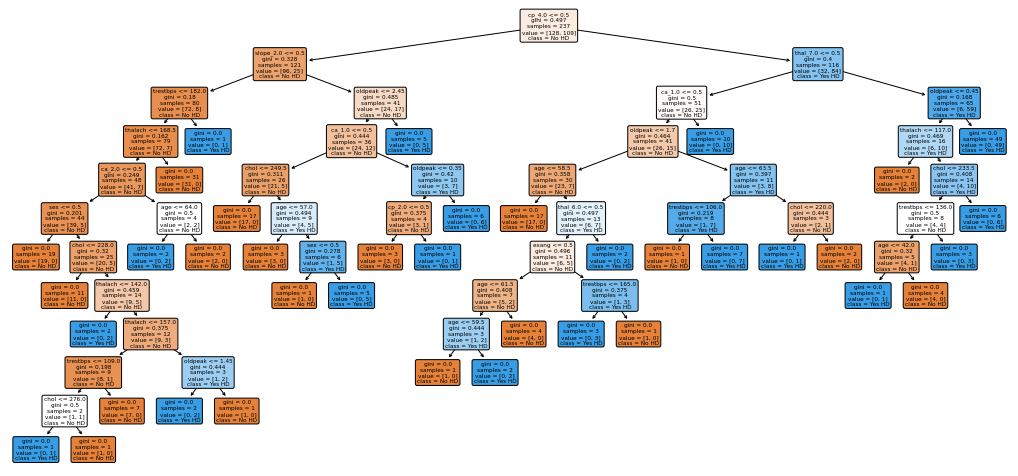

In [886]:
plt.figure(figsize=(18,8.5))
plot_tree(model,
         filled= True,
         rounded= True,
         class_names=['No HD', 'Yes HD'],
         feature_names= X_encoded.columns)

8. Show the Confusion Matrix, Classification report, and ROC-AUC

In [887]:
#Confusion_matrix
confusion_matrix_ = confusion_matrix(y_test['hd'], 
                                     y_test['predicted_HD'])

print('confusion_matrix: \n', confusion_matrix_)

confusion_matrix: 
 [[29  3]
 [ 9 19]]


In [888]:
y_test['hd'].value_counts()

0    32
1    28
Name: hd, dtype: int64

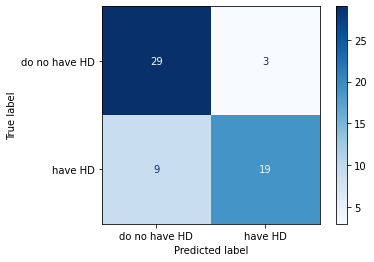

In [889]:
#Confusion_matrix in plot
plot_confusion_matrix(model, 
                      X_test, 
                      y_test['hd'], 
                      display_labels=["do no have HD", "have HD"],
                      cmap='Blues')
plt.show()

In [890]:
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)# True negetive means number of predicated data which successfully predict that 'do not have HD'

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)#False negetive means number of predicated data which predict that 'do not have HD' but actually 'have HD'


FP = confusion_matrix_[0,1]
print("False Positives = ", FP)# False positive means number of predicated data which predict that 'have HD' but actually 'do not have HD'


TP = confusion_matrix_[1,1]
print("True Positives = ", TP)#True positive means number of predicated data which successfully predict that 'have HD'


True Negatives =  29
False Negatives =  9
False Positives =  3
True Positives =  19


In [891]:
class_report = classification_report(y_test['hd'], 
                                     y_test['predicted_HD'])
print("Classification Report: \n", class_report)

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.68      0.76        28

    accuracy                           0.80        60
   macro avg       0.81      0.79      0.79        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
In classification report there are 3 indicator which measure the model performance <br>
1. Precision y-test = 0.86  #higher is better <br>
2. recall y-test = 0.68 #higher is better <br>
3. f1-score y-test = 0.76 #higher is better <br>
<br>
So, model performance is good but not best. <br>
So, we can try others classification model like LogisticRegression, RandomForestClassifier etc for better prediction results.

In [892]:
#True Positive Rate, False Positive Rate
TPR = np.round(TP/(TP+FN), 2)
FPR = np.round(FP/(FP+TN), 2)

print("True Positive Rate = ", TPR)
print("False Positive Rate = ", FPR)

True Positive Rate =  0.68
False Positive Rate =  0.09


ROC: Receiver Operating Characterisitcs and AUC: Area Under the Curve

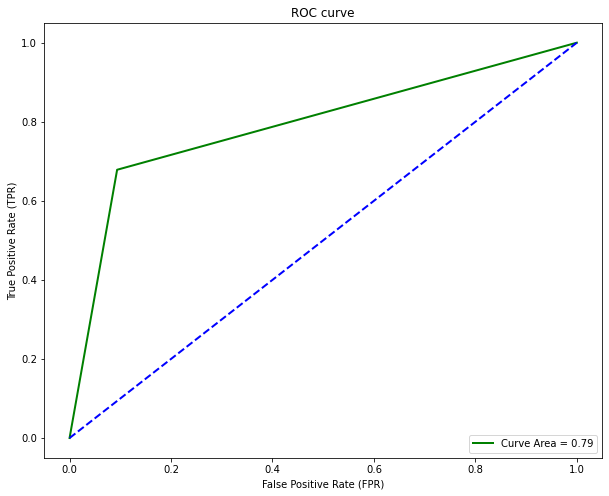

In [893]:
fpr, tpr, thr = roc_curve(y_test['hd'], 
                          y_test['probability'])
auc = np.round(roc_auc_score(y_test['hd'], 
                             y_test['predicted_HD']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

9. Explain your outcome.

From ROC curve,<br>
we can say that this model may be not best fitted for this data set. <br>
We know that higher the curve area prediction will be better.As precision, recall and f1-score values are not also satisfactory level. <br> 
we can try others to find out the best prediction model for this data set.